# Dog Breed Classification

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install -q smdebug
!pip install -q opencv-python
!pip install -q torch
!pip install -q torchvision --no-cache-dir

In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import os
import sagemaker
import boto3
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

import torchvision.models as models
from sagemaker.tuner import (
    IntegerParameter, 
     ContinuousParameter,
     CategoricalParameter, 
     HyperparameterTuner
)

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# # Command to download and unzip data
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !unzip dogImages.zip

# upload the unziped data to AWS S3
sagemaker_session = sagemaker.Session()
sagemaker_session.upload_data('dogImages/', bucket='sagemaker-deployment-project', key_prefix='data')

The total classes in train/test/valid data

In [5]:
%matplotlib inline

In [6]:
import os
dataset_type = ['train', 'test', 'valid']
classes = {}
for type in dataset_type:
    classes[type]=os.listdir(f'dogImages/{type}/')
    print(f'There are {len(classes[type])} classes in {type} dataset.')


The class distributions in /test/valid data

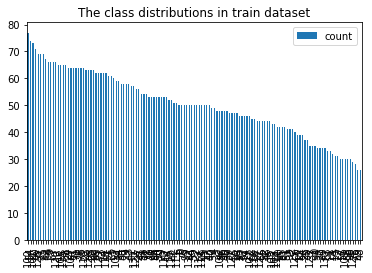

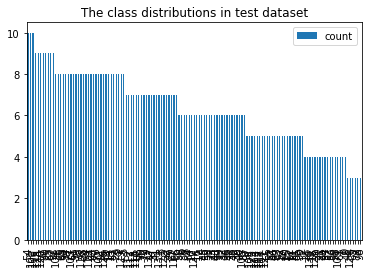

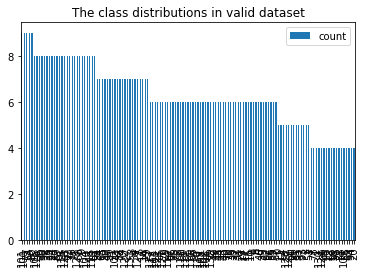

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

dog_breeds_train = {}
train_dir = 'dogImages/train'
for i in os.listdir(train_dir):
    dog_breeds_train[i] = [len(os.listdir(f'{train_dir}/{i}'))]

dog_breeds_test = {}
test_dir = 'dogImages/test'
for i in os.listdir(test_dir):
    dog_breeds_test[i] = [len(os.listdir(f'{test_dir}/{i}'))]

dog_breeds_valid = {}
valid_dir = 'dogImages/valid'
for i in os.listdir(valid_dir):
    dog_breeds_valid[i] = [len(os.listdir(f'{valid_dir}/{i}'))]

counts_dicts = {'train': dog_breeds_train, 'test': dog_breeds_test, 'valid': dog_breeds_valid }
for k, v in counts_dicts.items():
    classes_counts = pd.DataFrame(v).T.reset_index().rename(columns={'index': 'breed', 0: 'count'})
    classes_counts.sort_values(by='count', ascending=False).plot(kind='bar', label='', title=f'The class distributions in {k} dataset')
    

View some sample images

In [7]:
import glob
import random
from PIL import Image
import cv2

def get_image_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.jpg'))
        for f in files :
            all_files.append(os.path.abspath(f))
    return all_files

def select_random_image(filespath):
    images = get_image_files(train_filespath)
    # random select a image in specified dataset
    sample_img_file = random.choice(images)
    image = Image.open(sample_img_file)
    plt.imshow(image)
    plt.show()
    
    # image shape
    # Read the image file
    image = cv2.imread(sample_img_file)
    # print the height and width of the image
    print('image.shape: ', image.shape)


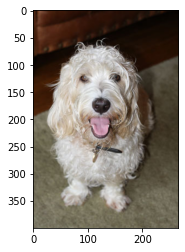

image.shape:  (400, 267, 3)


In [8]:
train_filespath = 'dogImages/train/'
select_random_image(train_filespath)

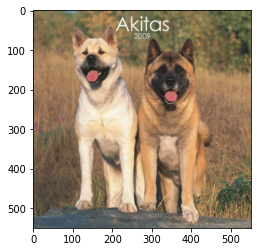

image.shape:  (550, 550, 3)


In [9]:
select_random_image(train_filespath)

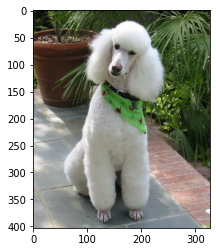

image.shape:  (403, 327, 3)


In [10]:
select_random_image(train_filespath)

check the width and height for the images in train data

In [11]:
import cv2

dataset_folder = 'dogImages/train/'

folders = os.listdir(dataset_folder)
images = []
image_shapes = []
for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    for path in os.listdir(folder_path):
        image_path = os.path.join(os.path.join(dataset_folder, folder), path)
        if 'jpg' in image_path:
            image = cv2.imread(image_path)
            # Convert to RGB as OpenCV uses BGR
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
            images.append(image)

            # Obtain shape of each image and store them in an array
            (width, height) = image.shape[1], image.shape[0]
            image_shapes.append((width, height))

# Return only unique shapes
unique_shapes = list(set(image_shapes))

In [17]:
print(f'unique_shapes for the data: ')
unique_shapes

unique_shapes for the data: 


[(375, 356),
 (250, 312),
 (400, 426),
 (346, 500),
 (383, 484),
 (520, 459),
 (629, 508),
 (297, 393),
 (3888, 2592),
 (400, 313),
 (635, 385),
 (319, 360),
 (247, 400),
 (360, 343),
 (342, 561),
 (400, 328),
 (275, 270),
 (936, 692),
 (385, 338),
 (386, 320),
 (353, 360),
 (500, 489),
 (300, 254),
 (300, 331),
 (389, 640),
 (563, 640),
 (675, 474),
 (325, 349),
 (589, 640),
 (517, 638),
 (384, 289),
 (496, 368),
 (650, 516),
 (600, 443),
 (598, 465),
 (250, 323),
 (526, 370),
 (551, 350),
 (572, 801),
 (1800, 2290),
 (994, 1004),
 (900, 675),
 (706, 590),
 (640, 502),
 (640, 571),
 (554, 554),
 (424, 609),
 (298, 403),
 (600, 356),
 (360, 350),
 (432, 640),
 (638, 586),
 (468, 476),
 (400, 335),
 (380, 334),
 (450, 630),
 (440, 342),
 (225, 225),
 (408, 319),
 (500, 496),
 (498, 500),
 (1024, 576),
 (412, 574),
 (179, 221),
 (275, 388),
 (480, 401),
 (2420, 1834),
 (500, 359),
 (464, 640),
 (120, 120),
 (800, 1002),
 (1024, 767),
 (2256, 1496),
 (163, 132),
 (400, 562),
 (608, 450),


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
bucket='sagemaker-deployment-project'
prefix='data'

In [ ]:
# # train directly

# from sagemaker.pytorch import PyTorch
# from sagemaker import get_execution_role

# role = get_execution_role()

# hyperparameters = {
#     "train_batch_size": 64,
#     "test_batch_size": 128,
#     "num_classes": 133,
#     "lr": 0.01,
#     "momentum": 0.9
# }

# estimator = PyTorch(
#     entry_point="train_model.py",
#     role=role,
#     framework_version ='1.6',
#     py_version='py36',
#     instance_count=1,
#     instance_type="ml.c4.4xlarge",
#     code_location='s3://sagemaker-deployment-project/model-artifacts',
#     hyperparameters=hyperparameters
# )

# estimator.fit({"train": "s3://sagemaker-deployment-project/data/train", "test": "s3://sagemaker-deployment-project/data/test"})

In [8]:
#TODO: Declare your HP ranges, metrics etc.

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "train_batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
}

![hpo.png](https://d-ehlicnlmgqny.studio.us-east-1.sagemaker.aws/jupyter/default/files/soothsayerworkflow/ref2/project/image_classification_project/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/hpo.png?_xsrf=2%7Cf17ea0a5%7C59b349f0f19a4676c2f89ae3150c860f%7C1664774910)

In [9]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch

# Create a estimator
estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    framework_version ='1.6',
    py_version='py36',
    instance_count=1,
    instance_type="ml.c4.4xlarge",
    code_location='s3://sagemaker-deployment-project/model-artifacts',
    hyperparameters={
        "test_batch_size": 128,
        "num_classes": 133,
        "momentum": 0.9
    }
)


objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

# Create a tuner
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [12]:
# TODO: Fit your HP Tuner
tuner.fit({"train": "s3://sagemaker-deployment-project/data/train", "test": "s3://sagemaker-deployment-project/data/valid"})

........................................................................................................................................................................................................................................................................................................................................................................................................................................................!



In [13]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()



2022-10-21 10:21:48 Starting - Preparing the instances for training
2022-10-21 10:21:48 Downloading - Downloading input data
2022-10-21 10:21:48 Training - Training image download completed. Training in progress.
2022-10-21 10:21:48 Uploading - Uploading generated training model
2022-10-21 10:21:48 Completed - Resource reused by training job: pytorch-training-221021-1001-004-55157056
{'_tuning_objective_metric': '"average test loss"',
 'lr': '0.004277615192677857',
 'momentum': '0.9',
 'num_classes': '133',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-10-21-10-01-17-755"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-deployment-project/model-artifacts/pytorch-training-2022-10-21-10-01-17-755/source/sourcedir.tar.gz"',
 'test_batch_size': '128',
 'train_batch_si

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [14]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerRule,
)

rules = [
    # debugging
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    # profiling
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

hyperparameters={
    'epochs':2, 
    'lr': 0.004277615192677857,
    'momentum': 0.9,
    'train_batch_size': 512,
    "test_batch_size": 128,
    "num_classes": 133,
    "momentum": 0.9
}

In [4]:
# TODO: Create and fit an estimator
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role

role= get_execution_role()

# Create a estimator
estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    framework_version ='1.6',
    py_version='py36',
    instance_count=1,
    instance_type="ml.c4.4xlarge",
    code_location='s3://sagemaker-deployment-project/model-artifacts',
    hyperparameters=hyperparameters,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
    rules=rules,
)

estimator.fit({"train": "s3://sagemaker-deployment-project/data/train", "test": "s3://sagemaker-deployment-project/data/valid"})

2022-10-23 05:40:49 Starting - Starting the training job...VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2022-10-23 05:41:42 Starting - Preparing the instances for training......
2022-10-23 05:42:42 Downloading - Downloading input data............
2022-10-23 05:44:43 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-10-23 05:44:43,649 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-10-23 05:44:43,651 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-23 05:44:43,662 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-10-23 05:44:43,670 sagemaker_pytorch_container.training 

In [5]:
# TODO: Plot a debugging output.

from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
trial = create_trial(estimator.latest_job_debugger_artifacts_path())
trial

[2022-10-23 06:36:41.782 mxnet-1-6-cpu-py36-ml-t3-medium-b41ed6572394778351801906eea8:105 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/debug-output
[2022-10-23 06:36:42.173 mxnet-1-6-cpu-py36-ml-t3-medium-b41ed6572394778351801906eea8:105 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-10-23 06:36:43.192 mxnet-1-6-cpu-py36-ml-t3-medium-b41ed6572394778351801906eea8:105 INFO trial.py:210] Loaded all steps


<smdebug.trials.s3_trial.S3Trial object at 0x7f7e640852b0>:(
    name=debug-output,
    path=s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/debug-output/,
    steps=[0, 14],
    collections=['gradients', 'all', 'losses', 'weights', 'default', 'biases', 'relu_input'],
    tensor_names=['CrossEntropyLoss_output_0', 'gradient/VGG_classifier.0.bias', 'gradient/VGG_classifier.0.weight', 'gradient/VGG_classifier.3.bias', 'gradient/VGG_classifier.3.weight', 'gradient/VGG_classifier.6.bias', 'gradient/VGG_classifier.6.weight', 'gradient/VGG_features.0.bias', 'gradient/VGG_features.0.weight', 'gradient/VGG_features.10.bias', 'gradient/VGG_features.10.weight', 'gradient/VGG_features.12.bias', 'gradient/VGG_features.12.weight', 'gradient/VGG_features.14.bias', 'gradient/VGG_features.14.weight', 'gradient/VGG_features.16.bias', 'gradient/VGG_features.16.weight', 'gradient/VGG_features.19.bias', 'gradient/VGG_features.19.weight', 'gradient/VGG_features.2.bias', 'grad

In [6]:
trial.tensor_names()

['CrossEntropyLoss_output_0',
 'gradient/VGG_classifier.0.bias',
 'gradient/VGG_classifier.0.weight',
 'gradient/VGG_classifier.3.bias',
 'gradient/VGG_classifier.3.weight',
 'gradient/VGG_classifier.6.bias',
 'gradient/VGG_classifier.6.weight',
 'gradient/VGG_features.0.bias',
 'gradient/VGG_features.0.weight',
 'gradient/VGG_features.10.bias',
 'gradient/VGG_features.10.weight',
 'gradient/VGG_features.12.bias',
 'gradient/VGG_features.12.weight',
 'gradient/VGG_features.14.bias',
 'gradient/VGG_features.14.weight',
 'gradient/VGG_features.16.bias',
 'gradient/VGG_features.16.weight',
 'gradient/VGG_features.19.bias',
 'gradient/VGG_features.19.weight',
 'gradient/VGG_features.2.bias',
 'gradient/VGG_features.2.weight',
 'gradient/VGG_features.21.bias',
 'gradient/VGG_features.21.weight',
 'gradient/VGG_features.23.bias',
 'gradient/VGG_features.23.weight',
 'gradient/VGG_features.25.bias',
 'gradient/VGG_features.25.weight',
 'gradient/VGG_features.28.bias',
 'gradient/VGG_features.

In [7]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

1

In [8]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

1

In [9]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


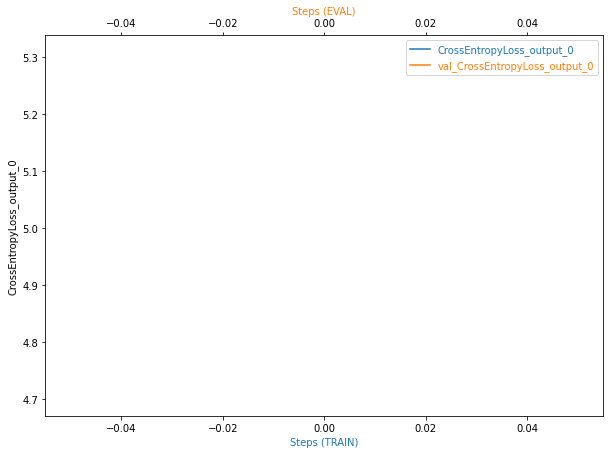

In [11]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [12]:
# TODO: Display the profiler output

rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
rule_output_path

's3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/rule-output'

In [13]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05-40-49-221/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-23-05

In [14]:
estimator.latest_training_job.rule_job_summary()

[{'RuleConfigurationName': 'VanishingGradient',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:526539017075:processing-job/pytorch-training-2022-10-2-vanishinggradient-9cbce356',
  'RuleEvaluationStatus': 'Error',
  'StatusDetails': 'InternalServerError: We encountered an internal error. Please try again.',
  'LastModifiedTime': datetime.datetime(2022, 10, 23, 6, 11, 56, 598000, tzinfo=tzlocal())},
 {'RuleConfigurationName': 'Overfit',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:526539017075:processing-job/pytorch-training-2022-10-2-overfit-0674dbdc',
  'RuleEvaluationStatus': 'NoIssuesFound',
  'LastModifiedTime': datetime.datetime(2022, 10, 23, 6, 11, 56, 598000, tzinfo=tzlocal())},
 {'RuleConfigurationName': 'Overtraining',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:526539017075:processing-job/pytorch-training-2022-10-2-overtraining-1850768e',
  'RuleEvaluationStatus': 'Error',
  'StatusDetails': 'InternalServerError: We encountered an internal error. 

In [15]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [16]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [4]:
# # If you need to restart you can create the huggingface_estimator with a job name:
# from sagemaker.estimator import Estimator
# estimator = Estimator.attach("pytorch-training-2022-10-21-14-59-23-880")


2022-10-21 15:18:39 Starting - Preparing the instances for training
2022-10-21 15:18:39 Downloading - Downloading input data
2022-10-21 15:18:39 Training - Training image download completed. Training in progress.
2022-10-21 15:18:39 Uploading - Uploading generated training model
2022-10-21 15:18:39 Completed - Training job completed


In [17]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.c4.4xlarge") # TODO: Add your deployment configuration like instance type and number of instances

-------!

In [20]:
# TODO: Run an prediction on the endpoint

from sagemaker.serializers import IdentitySerializer
import base64

# predictor.serializer = IdentitySerializer("image/png")
image = 'dogImages/valid/001.Affenpinscher/Affenpinscher_00041.jpg'
# with open('dogImages/valid/001.Affenpinscher/Affenpinscher_00041.jpg', "rb") as f:
#     payload = f.read()
# inference = predictor.predict(payload)    
inference = predictor.predict(image)
inference

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-training-2022-10-23-06-38-02-973 in account 526539017075 for more information.

In [47]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-training-2022-10-23-06-38-02-973
INFO:sagemaker:Deleting endpoint with name: pytorch-training-2022-10-23-06-38-02-973
